## 1. Extracción de datos

In [714]:
import numpy as np
import pandas as pd
import requests

# URL RAW del archivo JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Hacemos la solicitud HTTP para obtener los datos
response = requests.get(url)
data_json = response.json()

# Convertimos los datos a un DataFrame de pandas
df = pd.DataFrame(data_json)

def linea():
    print("-" * 70)

# Mostramos las primeras filas del DataFrame
print("[1] Primeras filas del DataFrame original (JSON sin normalizar):")
linea()
print(df.head())

# Normalizar las columnas anidadas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Unir todo en un solo DataFrame plano
df_unido = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Mostrar primeras filas para confirmar
print("\n[2] Primeras filas del DataFrame unificado (después de normalizar):")
linea()
print(df_unido.head())

[1] Primeras filas del DataFrame original (JSON sin normalizar):
----------------------------------------------------------------------
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineS

## 2. TRANSFORMACIÓN DE DATOS

### 2.1. Exploración básica

In [715]:
# Información general del nuevo DataFrame
print("[3] Información general del DataFrame unificado (df_unido):")
linea()
print(df_unido.info())

# Verificar valores únicos en 'Churn'  
print("\n [4] Valores únicos encontrados en la columna 'Churn':")
linea()
print(df_unido['Churn'].unique())

[3] Información general del DataFrame unificado (df_unido):
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  Strea

### 2.2. Limpieza

In [716]:
# Reemplazar strings vacíos en 'Churn' por NaN
df_unido['Churn'] = df_unido['Churn'].replace('', np.nan)

# Convertir 'Charges.Total' a numérico (coercionará los errores como NaN)
df_unido['Charges.Total'] = pd.to_numeric(df_unido['Charges.Total'], errors='coerce')

# Mostrar valores nulos por columna
print("[5] Cantidad de valores nulos por columna antes de limpieza:")
linea()
print(df_unido.isnull().sum())

# Eliminar filas con nulos en 'Churn' o 'Charges.Total'
df_filtro = df_unido.dropna(subset=['Churn', 'Charges.Total']).copy()

# Reemplazar strings vacíos en columnas categóricas
cols_to_fix = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_filtro[cols_to_fix] = df_filtro[cols_to_fix].replace('', np.nan)

# Verificamos que los nulos fueron eliminados
print("\n [6] Cantidad de valores nulos después de eliminar casos con Churn o Charges.Total vacíos:")
linea()
print(df_filtro.isnull().sum())

# Verificamos el nuevo tamaño del DataFrame
print(f"\nFilas antes de la limpieza: {df_unido.shape[0]}")
print(f"Filas después de la limpieza: {df_filtro.shape[0]}")

[5] Cantidad de valores nulos por columna antes de limpieza:
----------------------------------------------------------------------
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64

 [6] Cantidad de valores nulos después de eliminar casos con Churn o Charges.Total vacíos:
----------------------------------------------------------------------
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLine

In [717]:
print(df_unido.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [718]:
print(df_filtro.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

### 2.3. Creación de nuevas variables

In [719]:
# Crear columna de cuentas diarias
df_filtro['Cuentas_Diarias'] = df_filtro['Charges.Monthly'] / 30

# Verificar la nueva columna
print("[8] Visualización de 'Charges.Monthly' y la nueva columna 'Cuentas_Diarias':")
linea()
print(df_filtro[['Charges.Monthly', 'Cuentas_Diarias']].head())

[8] Visualización de 'Charges.Monthly' y la nueva columna 'Cuentas_Diarias':
----------------------------------------------------------------------
   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


### 2.4. Estandarización (Sí / No → True / False)

In [720]:
# Convertir columnas categóricas de 'yes'/'no' a booleanos
yes_no_map = {'Yes': True, 'No': False}
columns_to_convert = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convertir 'Yes'/'No' a booleano por columna
#df_filtro[columns_to_convert] = df_filtro[columns_to_convert].apply(lambda col: col.map(yes_no_map))

# Reemplazar Yes/No por booleanos y convertir a tipo bool
for col in columns_to_convert:
    df_filtro[col] = df_filtro[col].map(yes_no_map).astype('bool')

# Verificar las primeras filas para ver los cambios aplicados
print("[9] Columnas convertidas de 'Yes/No' a booleanos (True/False):")
linea()
print(df_filtro[columns_to_convert].head())

# Guardar el dataset limpio
df_filtro.to_csv('TelecomX_Limpio.csv', index=False)

[9] Columnas convertidas de 'Yes/No' a booleanos (True/False):
----------------------------------------------------------------------
   PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
0          True          False           False          True   
1          True           True           False         False   
2          True          False           False         False   
3          True          False           False          True   
4          True          False           False         False   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  
0             False         True         True            False  
1             False        False        False             True  
2              True        False        False            False  
3              True        False         True             True  
4             False         True         True            False  


## 3. Análisis descriptivo y correlación

In [721]:
# Mostrar las primeras filas del DataFrame limpio
print("[11] Primeras filas del DataFrame limpio (df_filtro):")
linea()
print(df_filtro.head())

[11] Primeras filas del DataFrame limpio (df_filtro):
----------------------------------------------------------------------
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

   PhoneService  MultipleLines InternetService  ...  DeviceProtection  \
0          True          False             DSL  ...             False   
1          True           True             DSL  ...             False   
2          True          False     Fiber optic  ...              True   
3          True          False     Fiber optic  ...              True   
4          True          False     Fiber optic  ...             False  

In [722]:
# Mostrar información general del DataFrame limpio
print("[12] Información general del DataFrame limpio:")
linea()
print(df_filtro.info())

[12] Información general del DataFrame limpio:
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   bool   
 8   MultipleLines     7032 non-null   bool   
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   bool   
 11  OnlineBackup      7032 non-null   bool   
 12  DeviceProtection  7032 non-null   bool   
 13  TechSupport       7032 non-null   bool   
 14  StreamingTV       7032 

In [723]:
# Verificar valores únicos en 'Churn' después de la limpieza
print("[13] Valores únicos en la columna 'Churn':")
linea()
print(df_filtro['Churn'].unique())

[13] Valores únicos en la columna 'Churn':
----------------------------------------------------------------------
['No' 'Yes']


In [724]:
# Verificar si hay valores nulos en el DataFrame limpio
print("[14] Conteo de valores nulos por columna:")
linea()
print(df_filtro.isnull().sum())

[14] Conteo de valores nulos por columna:
----------------------------------------------------------------------
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Cuentas_Diarias     0
dtype: int64


In [725]:
# Verificar si hay duplicados en el DataFrame limpio
print("[15] Total de filas duplicadas en el DataFrame limpio:")
linea()
print(df_filtro.duplicated().sum())

[15] Total de filas duplicadas en el DataFrame limpio:
----------------------------------------------------------------------
0


In [726]:
# Verificar valores únicos en las columnas categóricas
print("[16] Valores únicos por columna categórica (tipo object):")
linea()
for col in df_filtro.select_dtypes(include='object').columns:
    print(f"{col}: {df_filtro[col].unique()}")


[16] Valores únicos por columna categórica (tipo object):
----------------------------------------------------------------------
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [727]:
# Verificar la distribución de 'Churn'
print("[17] Distribución de la variable 'Churn' (frecuencia relativa):")
linea()
print(df_filtro['Churn'].value_counts(normalize=True))

[17] Distribución de la variable 'Churn' (frecuencia relativa):
----------------------------------------------------------------------
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


In [728]:
# Estadísticas descriptivas del DataFrame
print("[18] Estadísticas descriptivas del DataFrame limpio:")
linea()
print(df_filtro.describe(include='all'))

[18] Estadísticas descriptivas del DataFrame limpio:
----------------------------------------------------------------------
        customerID Churn gender  SeniorCitizen Partner Dependents  \
count         7032  7032   7032    7032.000000    7032       7032   
unique        7032     2      2            NaN       2          2   
top     9995-HOTOH    No   Male            NaN      No         No   
freq             1  5163   3549            NaN    3639       4933   
mean           NaN   NaN    NaN       0.162400     NaN        NaN   
std            NaN   NaN    NaN       0.368844     NaN        NaN   
min            NaN   NaN    NaN       0.000000     NaN        NaN   
25%            NaN   NaN    NaN       0.000000     NaN        NaN   
50%            NaN   NaN    NaN       0.000000     NaN        NaN   
75%            NaN   NaN    NaN       0.000000     NaN        NaN   
max            NaN   NaN    NaN       1.000000     NaN        NaN   

             tenure PhoneService MultipleLines 

In [729]:
# Verificar la correlación entre 'Charges.Total' y 'Churn'
correlation = df_filtro['Charges.Total'].corr(df_filtro['Churn'].astype('category').cat.codes)
print(f"Correlación entre Charges.Total y Churn: {correlation}")
print("Existe una mayor deserción del cliente (Churn) cuando los cargos totales son más altos, lo que indica que los clientes con mayores costos tienden a abandonar el servicio con más frecuencia.")

Correlación entre Charges.Total y Churn: -0.19948408356756445
Existe una mayor deserción del cliente (Churn) cuando los cargos totales son más altos, lo que indica que los clientes con mayores costos tienden a abandonar el servicio con más frecuencia.


# Informe final

## Introducción

En el contexto competitivo del sector de telecomunicaciones, retener clientes existentes es tan importante como adquirir nuevos. Este análisis tiene como objetivo comprender los factores que inciden en la evasión de clientes (churn) para la empresa Telecom X. Al identificar patrones y características asociadas a los clientes que abandonan el servicio, se busca apoyar la toma de decisiones estratégicas para reducir la tasa de deserción y mejorar la fidelización.

## Limpieza y Tratamiento de Datos

Se siguió un proceso sistemático de preprocesamiento y limpieza de datos que incluyó:
 - Carga y unificación de los datos de clientes desde distintas fuentes (incluyendo un archivo JSON de la API de Telecom X).
 - Conversión de columnas numéricas (Charges.Total) a formato adecuado y eliminación de registros con valores faltantes.
 - Conversión de variables categóricas de tipo Yes/No a booleanos (True/False) para facilitar el análisis.
 - Creación de la variable Cuentas_Diarias, una métrica derivada que representa el costo promedio diario del cliente.
 - Confirmación de la ausencia de valores nulos y duplicados luego del filtrado final, con un total de 7032 registros listos para análisis.

## Análisis Exploratorio de Datos

Se aplicó un conjunto de visualizaciones que permitieron observar patrones relevantes entre el churn y las características del cliente. Entre los gráficos más destacados:
 1. Distribución de Churn: Aproximadamente 26.5% de los clientes abandonaron el servicio (Churn = Yes).
 2. Tipo de Contrato: La deserción es significativamente más alta en clientes con contrato de mes a mes.
 3. Soporte Técnico y Seguridad en Línea: Los clientes sin soporte técnico o sin servicios de seguridad tienen mayor tendencia a desertar.
 4. Charges.Total vs Churn: Los clientes que desertan tienden a tener un gasto acumulado menor, lo que sugiere que son nuevos clientes insatisfechos.
 5. Cuentas_Diarias: Se identificó una correlación negativa moderada entre Cuentas_Diarias y churn, lo que indica que clientes con cargos diarios bajos tienden a quedarse más tiempo.
 6. Método de Pago: El uso de Electronic Check está asociado a una mayor tasa de deserción.
 7. Tipo de Servicio de Internet: La evasión es más alta en clientes con Fiber Optic comparado con DSL o Sin Servicio.
 8. Relación Cuentas_Diarias vs Charges.Total: Se confirma que clientes con menor gasto total y cuentas diarias más bajas están menos propensos a desertar.

## Conclusión

Aproximadamente el 26-27% de los clientes abandonan el servicio (Yes =~ 1,900 clientes) mientras que el 73-74% permanecen (No =~ 5,100 clientes).

Implicaciones:
 - Tasa de Churn Preocupante: Una tasa de deserción del ~27% es significativamente alta para la industria de telecomunicaciones, donde el promedio suele estar entre 15-20%.
 - Oportunidad de Mejora: Casi 1 de cada 4 clientes abandona el servicio, lo que representa una pérdida sustancial de ingresos y sugiere problemas en la retención.
 - Impacto Financiero: Con ~1,900 clientes perdidos, si consideramos un ingreso promedio mensual, la pérdida de ingresos anuales podría ser millonaria.

Esta distribución indica que Telecom X tiene un problema serio de retención de clientes que requiere acción inmediata. La empresa debería:
 1. Investigar las causas raíz del churn
 2. Implementar estrategias de retención proactivas
 3. Segmentar clientes en riesgo para intervenciones dirigidas
 4. Mejorar la experiencia del cliente en puntos críticos del journey

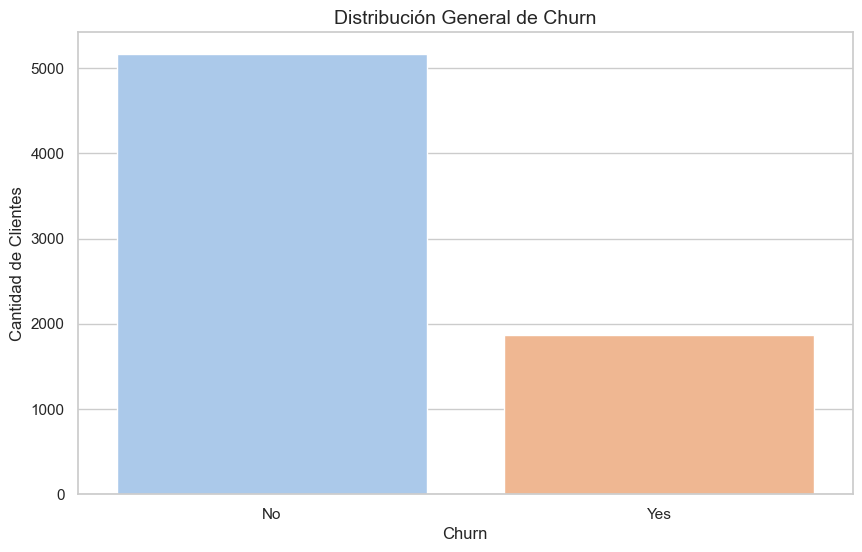

In [738]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style='whitegrid')
plt.rcParams.update({'figure.figsize': (10, 6), 'axes.titlesize': 14, 'axes.labelsize': 12})

# 1. Distribución de Churn
plt.figure()
sns.countplot(x='Churn', hue='Churn', data=df_filtro, palette='pastel', legend=False)
plt.title('Distribución General de Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de Clientes')
plt.show()

Los contratos mes a mes (Month-to-month) presentan una tasa de churn EXTREMADAMENTE alta, casi del 42-43%, mientras que los contratos de 1 y 2 años tienen tasas de retención mucho mejores.

Análisis:
 1. Month-to-month: ~2,200 clientes activos vs ~1,650 que desertan. Tasa de churn ≈ 43% - ¡Crítica!
 2. One year: ~1,300 clientes activos vs ~180 que desertan. Tasa de churn ≈ 12% - Saludable
 3. Two year: ~1,650 clientes activos vs ~60 que desertan. Tasa de churn ≈ 3.5% - Excelente

Insight:
 - Factor de Riesgo Principal: El tipo de contrato es el predictor más fuerte de churn identificado hasta ahora.
 - Patrón de Compromiso: A mayor duración del contrato, mayor fidelidad del cliente.
 - Oportunidad Inmediata: Los clientes month-to-month representan el segmento de mayor riesgo y requieren intervención urgente.

Recomendación:
 - Incentivos para Migración: Ofrecer descuentos significativos para migrar de month-to-month a contratos anuales
 - Programas de Fidelización: Beneficios exclusivos para contratos de largo plazo
 - Identificación Proactiva: Segmentar y monitorear intensivamente a clientes month-to-month
 - Mejora de Experiencia: Enfocarse en satisfacer a clientes sin compromiso contractual

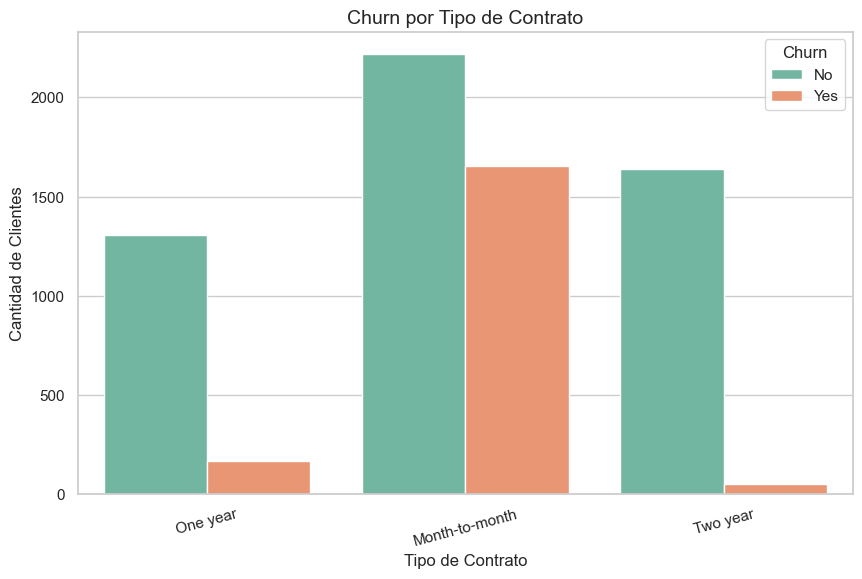

In [739]:
# 2. Churn por Tipo de Contrato
plt.figure()
sns.countplot(x='Contract', hue='Churn', data=df_filtro, palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.show()

El soporte técnico actúa como un FACTOR PROTECTOR altamente efectivo contra el churn. Los clientes sin soporte técnico desertan a una tasa mucho más alta que aquellos que sí lo tienen.

Análisis:
 - Clientes SIN Soporte Técnico (False): ~2,000 clientes activos vs ~1,450 que desertan. Tasa de churn ≈ 42% - ¡Crítica!
 - Clientes CON Soporte Técnico (True): ~3,100 clientes activos vs ~450 que desertan. Tasa de churn ≈ 13% - Saludable

Insight:
 - Efecto Protector: El soporte técnico reduce el churn en más del 70% (de 42% a 13%)
 - ROI del Soporte: La inversión en soporte técnico genera un retorno significativo en retención de clientes
 - Segmentación Clara: Existe una diferencia dramática entre clientes con y sin soporte técnico

Recomendación:
 - Promoción Agresiva: Incluir soporte técnico como estándar en planes básicos
 - Oferta Especial: Soporte técnico gratuito por 6 meses para clientes en riesgo
 - Capacitación: Mejorar la calidad del soporte técnico existente
 - Monitoreo: Seguimiento proactivo de clientes sin soporte técnico

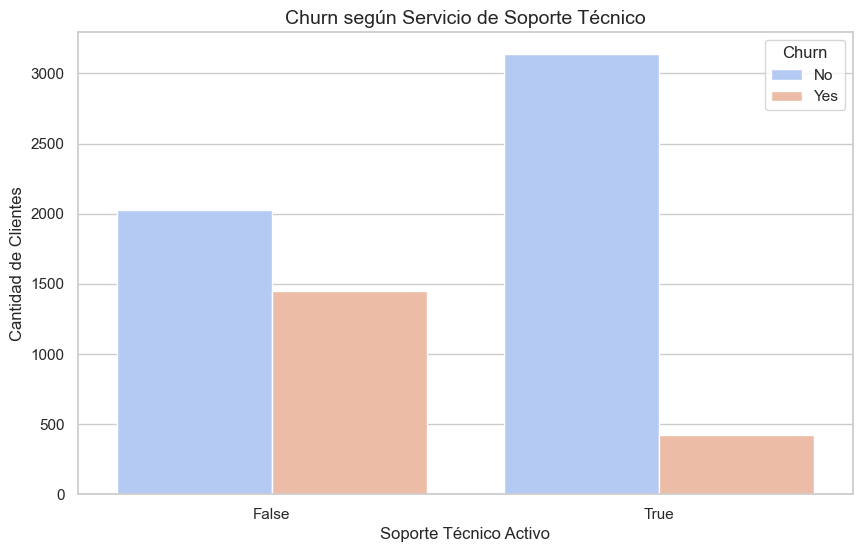

In [740]:
# 3. Churn por Servicio de Soporte Técnico
plt.figure()
sns.countplot(x='TechSupport', hue='Churn', data=df_filtro, palette='coolwarm')
plt.title('Churn según Servicio de Soporte Técnico')
plt.xlabel('Soporte Técnico Activo')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn')
plt.show()

Los clientes con Fiber Optic presentan una tasa de churn significativamente más alta que aquellos con DSL o sin servicio de internet, revelando una paradoja de expectativas.

Análisis:
 - DSL: ~1,900 clientes activos vs ~450 que desertan. Tasa de churn ≈ 19% - Aceptable
 - Fiber Optic: ~1,800 clientes activos vs ~1,300 que desertan. Tasa de churn ≈ 42% - ¡Crítica!
 - No (Sin Internet): ~1,400 clientes activos vs ~130 que desertan. Tasa de churn ≈ 8.5% - Excelente

Insight:
 - Paradoja del Servicio Premium: Los clientes que pagan más por Fiber Optic desertan más, sugiriendo que las expectativas no se cumplen.
 - Problema de Calidad vs Precio: Fiber Optic debería ser el servicio más estable, pero su alta tasa de churn indica problemas de calidad de servicio o soporte.
 - Segmento Conservador Leal: Los clientes sin internet son los más fieles, posiblemente porque tienen expectativas más bajas.

Recomendación
 - Auditoría de Calidad: Revisar la infraestructura y rendimiento de Fiber Optic
 - Gestión de Expectativas: Comunicación más realista sobre capacidades del servicio
 - Soporte Especializado: Equipo técnico dedicado exclusivamente para Fiber Optic
 - Monitoreo Proactivo: Identificar y resolver problemas antes de que causen churn

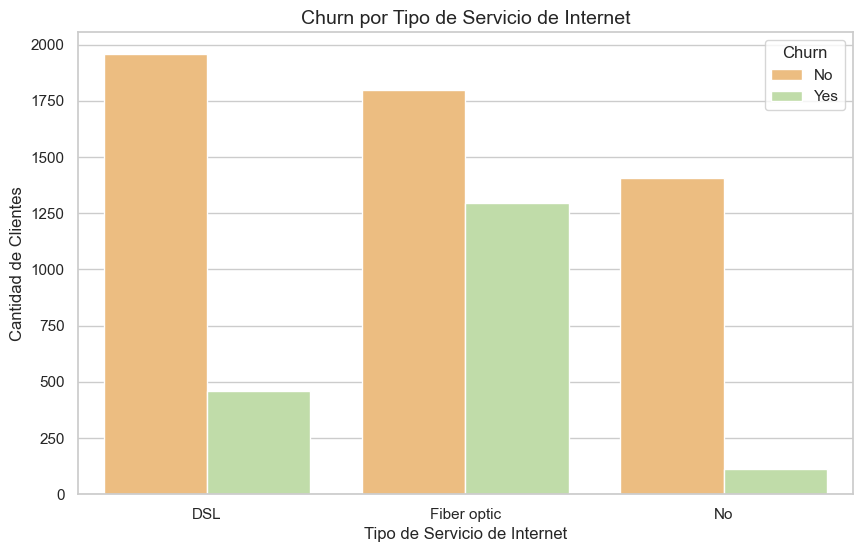

In [741]:
# 4. Churn por Tipo de Servicio de Internet
plt.figure()
sns.countplot(x='InternetService', hue='Churn', data=df_filtro, palette='Spectral')
plt.title('Churn por Tipo de Servicio de Internet')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn')
plt.show()

Existe una clara "zona de churn" en la parte inferior del gráfico, donde clientes con gastos totales bajos pero cuentas diarias similares desertan con mayor frecuencia, revelando un patrón de insatisfacción temprana.

Análisis:
 - Charges.Total < $2,000 con cualquier nivel de Cuentas_Diarias
 - Alta concentración de puntos azules (Churn = Yes)
 - Clientes nuevos o de corta duración que abandonan rápidamente

Insight:
 - El Tiempo es Dinero: Charges.Total actúa como proxy de antigüedad/lealtad. Clientes que llegan a gastar $4,000+ raramente desertan
 - Ventana Crítica: Los primeros $2,000 de gasto representan la "zona de peligro" donde se decide la retención
 - Paradoja de Precios: Clientes con cuentas diarias altas pero gastos totales bajos (esquina inferior derecha) tienen alta propensión al churn - sugiere planes caros que no justifican su valor rápidamente

Recomendación:
 - Programa "Primeros $2,000": Incentivos especiales y soporte intensivo para clientes en sus primeros meses
 - Alerta Temprana: Monitoreo proactivo de clientes con <$2,000 en gastos totales
 - Optimización de Precios: Revisar planes con cuentas diarias altas para nuevos clientes
 - Milestone Rewards: Celebrar y recompensar cuando clientes alcanzan $2,000 y $4,000 en gastos

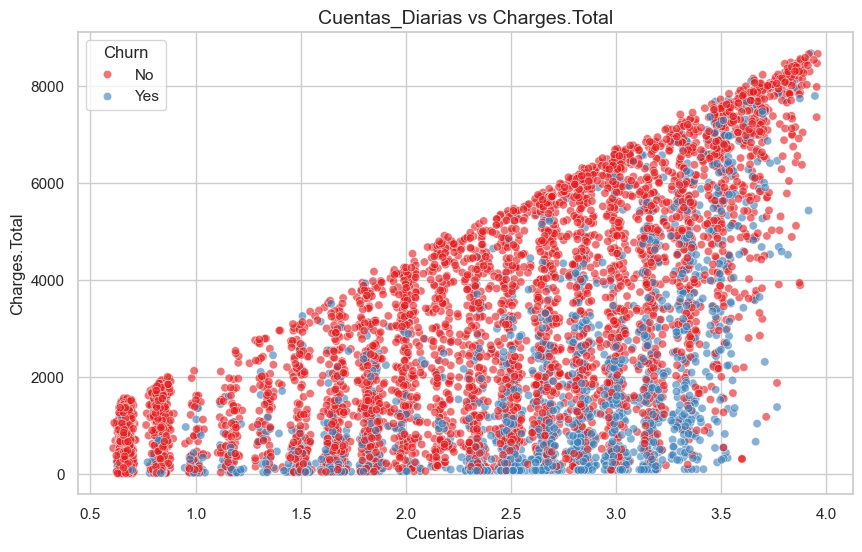

In [ ]:
# 5. Relación entre Cuentas_Diarias y Charges.Total
plt.figure()
sns.scatterplot(x='Cuentas_Diarias', y='Charges.Total', data=df_filtro, hue='Churn', palette='Set1', alpha=0.6)
plt.title('Cuentas_Diarias vs Charges.Total')
plt.xlabel('Cuentas Diarias')
plt.ylabel('Charges.Total')
plt.legend(title='Churn')
plt.show()